In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv('C:\\Users\\Sorcim\\Downloads\\archive (1)\\Churn_Modelling.csv')

In [24]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
X = dataset.iloc[:, 3:13]

In [26]:
y = dataset.iloc[:, 13]

In [27]:
geography = pd.get_dummies(X['Geography'], drop_first=True)

In [28]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [29]:
X = pd.concat([X, geography, gender], axis=1)

In [30]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [32]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [33]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [61]:
classifier = Sequential()

**Activation Function**
* use relu or leaky relu activation function
* leaky relu solve vanishing gradient problem

In [62]:
classifier.add(Dense(units=6,  activation = 'relu', kernel_initializer = 'he_uniform', input_dim=11))

**Weight initialization/kernel_initializer**
* always use `he_uniform` kernel_initializer/weight initializer with relu activation function.

In [63]:
classifier.add(Dense(units=6, activation = 'relu', kernel_initializer = 'he_uniform'))

**Activation function**
* use `Sigmoid` activation function in the output layer when you have two classes
* use `softmax` activation function in the output layer when you have more than 2 classes

In [64]:
classifier.add(Dense(units=1, activation = 'sigmoid', kernel_initializer='glorot_uniform'))

**Loss defining**
* Binary_crossentropy---> always use Binary_crossentropy loss for binary classes. or use binary_crossentropy for 2 classes. (e.g 1 or 0, yes or no, apple or banana)
* categorical_crossentropy---> use this loss when you have more than 2 items

In [65]:
classifier.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [66]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3882 - accuracy: 0.8341 - val_loss: 0.4012 - val_accuracy: 0.8213
Epoch 2/100
536/536 [==============================] - 1s 991us/step - loss: 0.3834 - accuracy: 0.8319 - val_loss: 0.3980 - val_accuracy: 0.8243
Epoch 3/100
536/536 [==============================] - 1s 990us/step - loss: 0.3803 - accuracy: 0.8332 - val_loss: 0.3935 - val_accuracy: 0.8247
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3766 - accuracy: 0.8358 - val_loss: 0.3906 - val_accuracy: 0.8262
Epoch 5/100
536/536 [==============================] - 1s 935us/step - loss: 0.3740 - accuracy: 0.8328 - val_loss: 0.3884 - val_accuracy: 0.8262
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3705 - accuracy: 0.8352 - val_loss: 0.3859 - val_accuracy: 0.8289
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3677 - accuracy: 0.8395 - val_loss: 0.3843 - val_accuracy: 

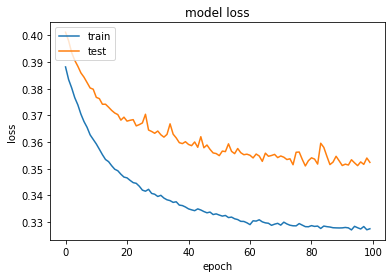

In [73]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[1499,   96],
       [ 185,  220]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)

In [78]:
score

0.8595